In [2]:
# Make data directory if it doesn't exist
!mkdir -p dataac
!wget -nc https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data

import tarfile

fname = "data/aclImdb_v1.tar.gz"
if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()

File ‘data/aclImdb_v1.tar.gz’ already there; not retrieving.



In [3]:
import os
list = os.listdir("aclImdb/train/pos")
pos = []

for file in list:
  f= open(os.path.join("aclImdb/train/pos",file),"r")
  pos.append(f.read())

print(len(pos))

12500


In [4]:
list = os.listdir("aclImdb/train/neg")
neg = []

for file in list:
  f= open(os.path.join("aclImdb/train/neg",file),"r")
  neg.append(f.read())

print(len(neg))

12500


In [6]:
import pandas as pd
pos_df = pd.DataFrame({'review':pos,'sentiment':1})
neg_df = pd.DataFrame({'review':neg,'sentiment':0})
imdb = pd.concat([pos_df,neg_df],axis=0,ignore_index=True)
imdb

,review,sentiment
0,Home Room was a great movie if you've ever had...,1
1,I lived in Tokyo for 7 months. Knowing the rea...,1
2,"'De Grot' is a terrific Dutch thriller, based ...",1
3,It was hard for me to believe all of the negat...,1
4,"Without ""mental anachronism"", this film which ...",1
...,...,...
24995,I had the misfortune of wasting 10 quid buying...,0
24996,"Well then, thank you SO MUCH Disney for DESTRO...",0
24997,I'm not alone in admiring the first Superman m...,0
24998,"<br /><br />Upon concluding my viewing of ""Tra...",0


Rule Based(Valence)

In [7]:
text = "Today was a good day"

from textblob import TextBlob

my_valence = TextBlob(text)
my_valence.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [10]:
text = "Today was a worst day"

from textblob import TextBlob

my_valence = TextBlob(text)
my_valence.sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

Word CLoud

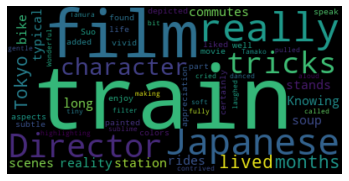

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud = WordCloud().generate(imdb['review'][1])

plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


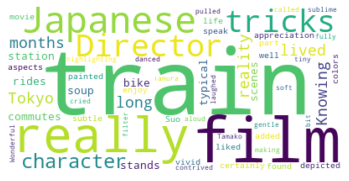

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

cloud = WordCloud(background_color='white',stopwords=stopwords.words('english')).generate(imdb['review'][1])

plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Count Vectorizer - Bag of words

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(max_features=1000)
count.fit(imdb.review)
X1 = count.transform(imdb.review)
X_count = pd.DataFrame(X1.toarray(),columns=count.get_feature_names())
print(X_count)

       10  20  30  80  able  about  ...  york  you  young  your  yourself  zombie
0       0   0   0   0     0      0  ...     0    4      0     1         0       0
1       0   0   0   0     0      0  ...     0    1      0     0         0       0
2       0   0   0   0     0      0  ...     0    1      1     0         0       0
3       0   0   0   0     0      1  ...     0    0      0     0         0       0
4       0   0   0   0     2      0  ...     0    1      0     0         0       0
...    ..  ..  ..  ..   ...    ...  ...   ...  ...    ...   ...       ...     ...
24995   2   0   0   0     0      0  ...     0    1      0     0         0       0
24996   0   0   0   0     0      1  ...     0    2      0     1         0       0
24997   0   0   0   0     0      0  ...     0    0      0     0         0       0
24998   1   0   0   0     0      0  ...     0    2      0     0         0       0
24999   0   0   0   0     0      0  ...     0    1      0     0         0       0

[25000 rows x 1

N-Gram (Multiple tokens)

In [14]:
count = CountVectorizer(max_features=2000,ngram_range=(1,2))
count.fit(imdb.review)
X1 = count.transform(imdb.review)
X_ngram = pd.DataFrame(X1.toarray(),columns=count.get_feature_names())
print(X_ngram)

       10  15  20  30  50  ...  your  your time  yourself  zombie  zombies
0       0   0   0   0   0  ...     1          0         0       0        0
1       0   0   0   0   0  ...     0          0         0       0        0
2       0   0   0   0   0  ...     0          0         0       0        0
3       0   0   0   0   0  ...     0          0         0       0        0
4       0   0   0   0   0  ...     0          0         0       0        0
...    ..  ..  ..  ..  ..  ...   ...        ...       ...     ...      ...
24995   2   0   0   0   0  ...     0          0         0       0        0
24996   0   0   0   0   0  ...     1          1         0       0        0
24997   0   0   0   0   0  ...     0          0         0       0        0
24998   1   0   0   0   0  ...     0          0         0       0        0
24999   0   0   0   0   0  ...     0          0         0       0        0

[25000 rows x 2000 columns]


Adding new features 1)length 2)punctuaitons count 3)No of sentences

In [15]:
from nltk import word_tokenize
nltk.download('punkt')

word_tokens = [word_tokenize(text) for text in imdb.review]

len_tokens = []
for i in range(len(word_tokens)):
  len_tokens.append(len(word_tokens[i]))

imdb['n_words'] = len_tokens
print(imdb)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
                                                  review  sentiment  n_words
0      Home Room was a great movie if you've ever had...          1      163
1      I lived in Tokyo for 7 months. Knowing the rea...          1      142
2      'De Grot' is a terrific Dutch thriller, based ...          1      492
3      It was hard for me to believe all of the negat...          1      297
4      Without "mental anachronism", this film which ...          1      177
...                                                  ...        ...      ...
24995  I had the misfortune of wasting 10 quid buying...          0      312
24996  Well then, thank you SO MUCH Disney for DESTRO...          0      379
24997  I'm not alone in admiring the first Superman m...          0      190
24998  <br /><br />Upon concluding my viewing of "Tra...          0      258
24999  I remember watching "Lost Missile" (actu

Language Detection

In [16]:
!pip install langdetect

     |████████████████████████████████| 983kB 8.7MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=8060771f7963bae30e1e951170acee06240c59174ab7ea10938e400dbe0f3d50
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [17]:
from langdetect import detect_langs

languages = []

for row in range(len(imdb)):
  languages.append(detect_langs(imdb.review[row]))

print(languages)

[[en:0.9999968454401416], [en:0.9999971252715928], [en:0.9999959645357648], [en:0.9999985775007834], [en:0.9999977464523742], [en:0.9999945104117934], [en:0.9999958179691097], [en:0.9999973754731487], [en:0.99999590938797], [en:0.9999974387444128], [en:0.9999974365220136], [en:0.9999970060414753], [en:0.9999971176729396], [en:0.999997086071187], [en:0.9999964351083922], [en:0.9999980971666382], [en:0.9999959526948055], [en:0.9999964111291556], [en:0.9999960312775271], [en:0.9999967242367849], [en:0.999996319280154], [en:0.9999963471662949], [en:0.9999956537364247], [en:0.999995892682247], [en:0.9999963627607673], [en:0.9999981842458219], [en:0.9999964106388919], [en:0.9999944814645014], [en:0.999995077969918], [en:0.9999979535139848], [en:0.9999970746422393], [en:0.9999972387722036], [en:0.9999979547919662], [en:0.9999969302792164], [en:0.9999942163390684], [en:0.9999988583025328], [en:0.9999968168544038], [en:0.9999961728254477], [en:0.9999980352896538], [en:0.9999970781180255], [en:0

In [ ]:
languages = [str(lang).split(':')[0][1:] for lang in languages]
imdb['language']=languages
print(imdb)

                                                  review  ...  language
0      "The Mother" is a weird low-budget movie, touc...  ...        en
1      I had no idea that Mr. Izzard was so damn funn...  ...        en
2      For all of you that don't speak swedish: The s...  ...        en
3      What another reviewer called lack of character...  ...        en
4      How can a movie that features the singing of C...  ...        en
...                                                  ...  ...       ...
24995  This movie is easily the worst of the series. ...  ...        en
24996  Platoon is to the Vietnam War as Rocky IV is t...  ...        en
24997  This is only related to the first movie by the...  ...        en
24998  In the future of 2001, Freddy is after the las...  ...        en
24999  Have not watched kids films for some years, so...  ...        en

[25000 rows x 4 columns]


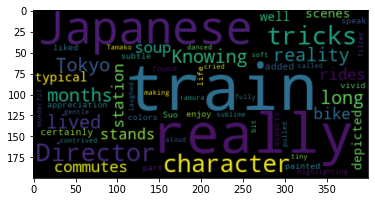

In [18]:
from wordcloud import WordCloud,STOPWORDS

my_stopwords = set(STOPWORDS)
my_stopwords.update(['movie','movies','film','cinema'])

my_cloud = WordCloud(stopwords=my_stopwords).generate(imdb.review[1])
plt.imshow(my_cloud,interpolation='bilinear')
plt.show()

Tfidf

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000).fit(imdb.review)
X1 = tfidf.transform(imdb.review)

X_tfidf = pd.DataFrame(X1.toarray(),columns=tfidf.get_feature_names())
print(X_tfidf)

             10   20   30   80  ...     young      your  yourself  zombie
0      0.000000  0.0  0.0  0.0  ...  0.000000  0.080480       0.0     0.0
1      0.000000  0.0  0.0  0.0  ...  0.000000  0.000000       0.0     0.0
2      0.000000  0.0  0.0  0.0  ...  0.042358  0.000000       0.0     0.0
3      0.000000  0.0  0.0  0.0  ...  0.000000  0.000000       0.0     0.0
4      0.000000  0.0  0.0  0.0  ...  0.000000  0.000000       0.0     0.0
...         ...  ...  ...  ...  ...       ...       ...       ...     ...
24995  0.134026  0.0  0.0  0.0  ...  0.000000  0.000000       0.0     0.0
24996  0.000000  0.0  0.0  0.0  ...  0.000000  0.049584       0.0     0.0
24997  0.000000  0.0  0.0  0.0  ...  0.000000  0.000000       0.0     0.0
24998  0.071930  0.0  0.0  0.0  ...  0.000000  0.000000       0.0     0.0
24999  0.000000  0.0  0.0  0.0  ...  0.000000  0.000000       0.0     0.0

[25000 rows x 1000 columns]


Logistic Regression

using count vectorizer

In [20]:
y=imdb.sentiment
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_count,y,test_size=0.3,stratify=y,random_state=1)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
print("Train Accuracy",accuracy_score(y_train,y_pred))
y_pred = lr.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_pred,y_test)/len(y_test))

Train Accuracy 0.8849142857142858
Test Accuracy:  0.8524
[[0.418  0.0656]
 [0.082  0.4344]]


using ngram vectorizer

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X_ngram,y,test_size=0.3,stratify=y,random_state=1)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
print("Train Accuracy",accuracy_score(y_train,y_pred))
y_pred = lr.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_pred,y_test)/len(y_test))

Train Accuracy 0.9122857142857143
Test Accuracy:  0.8434666666666667
[[0.41613333 0.07266667]
 [0.08386667 0.42733333]]


using Tfidf vectorizer

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X_tfidf,y,test_size=0.3,stratify=y,random_state=1)
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
print("Train Accuracy",accuracy_score(y_train,y_pred))
y_pred = lr.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_pred,y_test)/len(y_test))

Train Accuracy 0.8786285714285714
Test Accuracy:  0.8536
[[0.4196 0.066 ]
 [0.0804 0.434 ]]
